# パターン認識

## データの読み込み

### データの読み込み

In [ ]:
from pandas._libs.tslibs.vectorized import normalize_i8_timestamps
import io
import pandas as pd
import csv
import time

start = time.perf_counter()


input_data = ""
label_data = ""

# ローカル
# f2 = "run13136_0_200000(realData).csv"


# col_names =['DCHit','hitSurfaceArea','momentum','polaCell','azimuth','wireFaceNumber1','z-coordinate','wireCoordinates','driftTime','wireFaceNumber2','z-coordinate','wireCoordinates','driftTime','wireFaceNumber3','z-coordinate','wireCoordinates','driftTime','wireFaceNumber4','z-coordinate','wireCoordinates','driftTime','wireFaceNumber5','z-coordinate','wireCoordinates','driftTime','wireFaceNumber6','z-coordinate','wireCoordinates','driftTime','wireFaceNumber7','z-coordinate','wireCoordinates','driftTime','wireFaceNumber8','z-coordinate','wireCoordinates','driftTime','wireFaceNumber9','z-coordinate','wireCoordinates','driftTime','wireFaceNumber10','z-coordinate','wireCoordinates','driftTime','wireFaceNumber11','z-coordinate','wireCoordinates','driftTime','wireFaceNumber12','z-coordinate','wireCoordinates','driftTime','wireFaceNumber13','z-coordinate','wireCoordinates','driftTime','wireFaceNumber14','z-coordinate','wireCoordinates','driftTime','wireFaceNumber15','z-coordinate','wireCoordinates','driftTime','wireFaceNumber16','z-coordinate','wireCoordinates','driftTime','wireFaceNumber17','z-coordinate','wireCoordinates','driftTime','wireFaceNumber18','z-coordinate','wireCoordinates','driftTime','wireFaceNumber19','z-coordinate','wireCoordinates','driftTime','wireFaceNumber20','z-coordinate','wireCoordinates','driftTime','wireFaceNumber21','z-coordinate','wireCoordinates','driftTime','wireFaceNumber22','z-coordinate','wireCoordinates','driftTime','wireFaceNumber23','z-coordinate','wireCoordinates','driftTime','wireFaceNumber24','z-coordinate','wireCoordinates','driftTime']
input_col_names = [ 'c{0:02d}'.format(i) for i in range(302) ]
label_col_names = [ 'd{0:02d}'.format(i) for i in range(101) ]

# 結合が必要な場合
# auto1 = pd.read_csv(f1,names=col_names)
# auto2 = pd.read_csv(f2,names=col_names)

# auto = pd.concat([auto1, auto2]) # 結合

auto_input = pd.read_csv(input_data,names=input_col_names, dtype="float32")
auto_label = pd.read_csv(label_data,names=label_col_names, dtype="float32")

del input_col_names, label_col_names

# c00とd00をキーとして結合
auto = pd.merge(auto_input, auto_label, left_on='c00', right_on='d00')

del auto_input, auto_label

# 不要な列を削除（d00列は重複しているため削除）
auto.drop(columns=['d00'], inplace=True)

# 結合したデータを確認
print(auto)

print(time.perf_counter() - start)
# auto


              c00          c01         c02       c03          c04         c05  \
0             5.0  1057.812988   20.146124  4.026817   704.273010 -156.991135   
1             6.0  1074.000000 -291.819458  7.392890  1074.000000 -275.819458   
2            10.0  1074.000000 -307.819458  6.697766  1074.000000 -291.819458   
3            12.0  1074.000000 -307.819458  0.783179  1057.812988 -299.853882   
4            13.0  1074.000000   28.180544  6.092792  1057.812988   36.146122   
...           ...          ...         ...       ...          ...         ...   
513694  1499989.0  1074.000000 -227.819458  1.880103  1074.000000 -211.819458   
513695  1499990.0  1074.000000 -131.819458  0.439452  1057.812988 -139.853882   
513696  1499992.0  1074.000000   12.180544  6.840739  1057.812988    4.146123   
513697  1499993.0   672.286011  -28.009659  6.416358   672.286011  -12.009659   
513698  1499994.0  1074.000000  172.180542  1.823901  1057.812988  164.146118   

             c06          c

### データのクラス割合を調整

In [ ]:
import pandas as pd
from sklearn.utils import resample



# 0と1のデータをそれぞれ抽出
data_0 = auto[auto['c301'] == 0]
data_1 = auto[auto['c301'] == 1]

# データ数を取得
count_0 = len(data_0)
count_1 = len(data_1)

# サンプリング後の目標データ数を設定
target_count = min(100000, min(count_0, count_1))  # 最大200,000になるように調整



# resample関数を使ってサンプリング
sampled_data_0 = resample(data_0, replace=False, n_samples=target_count, random_state=42)
sampled_data_1 = resample(data_1, replace=False, n_samples=target_count, random_state=42)

# 新しいデータフレームに結合
auto = pd.concat([sampled_data_0, sampled_data_1])

del sampled_data_0, sampled_data_1

# 割合を表示
print(f'Original 0s: {count_0}, Original 1s: {count_1}')
print(f'Sampled 0s: {target_count}, Sampled 1s: {target_count}')

Original 0s: 410248, Original 1s: 103451
Sampled 0s: 100000, Sampled 1s: 100000


### 入力層に取り込む列のラベルのリストを作成

In [ ]:

input_columns = [col for col in auto.columns if 'c' in col]
label_columns = [col for col in auto if 'd' in col]

# 不要な列を削除
input_columns.remove('c00')
input_columns.remove('c301')



print(input_columns)
print(label_columns)


['c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100', 'c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c110', 'c111', 'c112', 'c113', 'c114', 'c115', 'c116', 'c117', 'c118', 'c119', 'c120', 'c121', 'c122', 'c123', 'c124', 'c125', 'c126', 'c127', 'c128', 'c129', 'c130', 'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c

## データの整理・分析

In [ ]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
# %precision 3

In [ ]:
# データの形式と欠損数を出力
print('データの形式:{}'.format(auto.shape))
print('欠損の数:{}'.format(auto.isnull().sum().sum()))

# 目的変数のクラス割合を出力
total_rows = len(auto)
count_0 = auto['c401'].value_counts()[0]
count_1 = auto['c401'].value_counts()[1]

ratio_0 = count_0 / total_rows
ratio_1 = count_1 / total_rows

print(f'class 0: {ratio_0:.2f}')
print(f'class 1: {ratio_1:.2f}')

# データの先頭5行を出力
auto.head(100)

データの形式:(200000, 203)
欠損の数:0
class 0: 0.50
class 1: 0.50


,c00,c02,c03,c06,c07,c10,c11,c14,c15,c18,...,c386,c387,c390,c391,c394,c395,c398,c399,c400,c401
747164,487419,434.2,388,434.2,404,434.2,420,434.2,436,418.2,...,0.0,0,0.0,0,0,0,0,0,0,0
484713,1354164,498.2,4,482.2,12,450.2,-4,418.2,-4,671.8,...,0.0,0,0.0,0,0,0,0,0,0,0
710760,1312456,498.2,-12,482.2,-20,482.2,-4,466.2,-28,450.2,...,0.0,0,0.0,0,0,0,0,0,0,0
174866,1520092,703.8,-604,703.8,-588,687.8,-596,687.8,-580,671.8,...,0.0,0,0.0,0,0,0,0,0,0,0
853188,988827,498.2,-252,498.2,-236,498.2,36,482.2,-244,482.2,...,0.0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487672,425461,498.2,452,498.2,468,482.2,444,482.2,460,466.2,...,0.0,0,0.0,0,0,0,0,0,0,0
340683,1243893,671.8,4,1026.0,-12,1042.0,-4,1074.0,-4,0.0,...,0.0,0,0.0,0,0,0,0,0,0,0
78599,290596,498.2,-220,498.2,-12,498.2,36,498.2,52,482.2,...,0.0,0,0.0,0,0,0,0,0,0,0
454797,224709,498.2,-636,498.2,-620,498.2,212,482.2,-628,482.2,...,0.0,0,0.0,0,0,0,0,0,0,0


### モデル構築と評価

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数の設定
  # 1粒子データにおいて0を含まない範囲
# X = auto[['c03', 'c04', 'c05', 'c07', 'c08', 'c09', 'c11', 'c12', 'c13', 'c15', 'c16', 'c17', 'c19', 'c20', 'c21', 'c23', 'c24', 'c25', 'c27', 'c28', 'c29', 'c31', 'c32', 'c33', 'c35', 'c36', 'c37', 'c39', 'c40', 'c41', 'c43', 'c44', 'c45', 'c47', 'c48', 'c49', 'c51', 'c52', 'c53', 'c55', 'c56', 'c57', 'c59', 'c60', 'c61', 'c63', 'c64', 'c65', 'c67', 'c68', 'c69', 'c71', 'c72', 'c73', 'c75', 'c76', 'c77', 'c79', 'c80', 'c81', 'c83', 'c84', 'c85', 'c87', 'c88', 'c89', 'c91', 'c92', 'c93', 'c95', 'c96', 'c97']]
# X = auto[['c03', 'c04', 'c05', 'c07', 'c08', 'c09', 'c11', 'c12', 'c13', 'c15', 'c16', 'c17', 'c19', 'c20', 'c21', 'c23', 'c24', 'c25', 'c27', 'c28', 'c29', 'c31', 'c32', 'c33', 'c35', 'c36', 'c37', 'c39', 'c40', 'c41', 'c43', 'c44', 'c45', 'c47', 'c48', 'c49', 'c51', 'c52', 'c53', 'c55', 'c56', 'c57', 'c59', 'c60', 'c61', 'c63', 'c64', 'c65', 'c67', 'c68', 'c69', 'c71', 'c72', 'c73', 'c75', 'c76', 'c77', 'c79', 'c80', 'c81', 'c83', 'c84', 'c85', 'c87', 'c88', 'c89', 'c91', 'c92', 'c93', 'c95', 'c96', 'c97', 'c99', 'c100', 'c101', 'c103', 'c104', 'c105', 'c107', 'c108', 'c109', 'c111', 'c112', 'c113', 'c115', 'c116', 'c117', 'c119', 'c120', 'c121', 'c123', 'c124', 'c125', 'c127', 'c128', 'c129', 'c131', 'c132', 'c133', 'c135', 'c136', 'c137', 'c139', 'c140', 'c141', 'c143', 'c144', 'c145', 'c147', 'c148', 'c149', 'c151', 'c152', 'c153', 'c155', 'c156', 'c157', 'c159', 'c160', 'c161', 'c163', 'c164', 'c165', 'c167', 'c168', 'c169', 'c171', 'c172', 'c173', 'c175', 'c176', 'c177', 'c179', 'c180', 'c181', 'c183', 'c184', 'c185', 'c187', 'c188', 'c189', 'c191', 'c192', 'c193', 'c195', 'c196', 'c197', 'c199', 'c200', 'c201', 'c203', 'c204', 'c205', 'c207', 'c208', 'c209', 'c211', 'c212', 'c213', 'c215', 'c216', 'c217', 'c219', 'c220', 'c221', 'c223', 'c224', 'c225', 'c227', 'c228', 'c229', 'c231', 'c232', 'c233', 'c235', 'c236', 'c237', 'c239', 'c240', 'c241', 'c243', 'c244', 'c245', 'c247', 'c248', 'c249', 'c251', 'c252', 'c253', 'c255', 'c256', 'c257', 'c259', 'c260', 'c261', 'c263', 'c264', 'c265', 'c267', 'c268', 'c269', 'c271', 'c272', 'c273', 'c275', 'c276', 'c277', 'c279', 'c280', 'c281', 'c283', 'c284', 'c285', 'c287', 'c288', 'c289', 'c291', 'c292', 'c293', 'c295', 'c296', 'c297', 'c299', 'c300', 'c301', 'c303', 'c304', 'c305', 'c307', 'c308', 'c309', 'c311', 'c312', 'c313', 'c315', 'c316', 'c317', 'c319', 'c320', 'c321', 'c323', 'c324', 'c325', 'c327', 'c328', 'c329', 'c331', 'c332', 'c333', 'c335', 'c336', 'c337', 'c339', 'c340', 'c341', 'c343', 'c344', 'c345', 'c347', 'c348', 'c349', 'c351', 'c352', 'c353', 'c355', 'c356', 'c357', 'c359', 'c360', 'c361', 'c363', 'c364', 'c365', 'c367', 'c368', 'c369', 'c371', 'c372', 'c373', 'c375', 'c376', 'c377', 'c379', 'c380', 'c381', 'c383', 'c384', 'c385', 'c387', 'c388', 'c389', 'c391', 'c392', 'c393', 'c395', 'c396', 'c397', 'c399', 'c400', 'c401']]

X = auto[col_names] # すべての列を扱う
# X = auto[['c03', 'c04', 'c05', 'c07', 'c08', 'c09']]
y = auto['c01']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))



# Predict the values for test data
y_pred = model.predict(X_test)



# Print each test data's prediction result
for true, pred in zip(y_test, y_pred):
    if true == pred:
        print('正答')
    else:
        print('不正答')

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))

## tensowflowで行う機械学習

### パッケージ

In [ ]:
#------
#  Sample Program for Tutorials on 2021/05/14
#  !!!! ---  Do Not Disstribute this program  --- !!!!
#
#  2019/11/07 Sample Program for Tutorials at KEK
#     Akihiro Hisano Osaka-City Univ. (+ modofication by M.Iwasaki)
#------
#
import sys
sys.setrecursionlimit(2000)
import numpy as np

from __future__ import print_function

from matplotlib import pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow.python.client import device_lib

# At KEK
import tensorflow.keras as kera
#
from tensorflow.keras import backend
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import SGD


from sklearn.model_selection import train_test_split

import hyperopt
from hyperopt import fmin, tpe, hp
from sklearn.metrics import f1_score
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import accuracy_score


2.15.0


### event番号ありのデータの学習

#### 学習と評価

In [ ]:


epochs = 20

X = auto[input_columns] # すべての列を扱う
y = auto[label_columns]

# 列"c00"を別の変数に保存
c00_info = auto['c00']

# トラック有り無しデータのラベル
c301_info = auto['c301']

del auto, input_columns, label_columns

# 訓練データとテストデータに分ける
x_train, x_test, y_train, y_test, c00_train, c00_test, c301_train, c301_test = train_test_split(X, y, c00_info, c301_info, test_size=0.3, random_state=0)

# 各行の0埋めの数を数える
x_train_count_hits = 100 - np.count_nonzero(x_train == 0, axis=1) / 3
x_test_count_hits = 100 - np.count_nonzero(x_test == 0, axis=1) / 3
x_train_count_hits = x_train_count_hits.astype(int)
x_test_count_hits = x_test_count_hits.astype(int)

print(c00_test)



# y_train = kera.utils.to_categorical(y_train, num_classes)

# y_test = kera.utils.to_categorical(y_test, num_classes)

118283     334086.0
298070     860471.0
443799    1299014.0
413610    1212621.0
356634    1038145.0
            ...    
130104     367968.0
4681        13189.0
182658     518568.0
211011     601057.0
129573     366487.0
Name: c00, Length: 60000, dtype: float32


#### ハイパーパラメータ探索

In [ ]:
start = time.perf_counter()

input_size = 300
output_size = 100

# Step 1: ハイパーパラメータ探索範囲を定義
space = {
    'batch_size': hp.choice('batch_size', [64, 128, 256, 512]), #バッチサイズ
    'layers': hp.randint('layers', 26) + 5,  # 中間層
    'neurons': hp.choice('neurons', [64, 128, 256, 512,1024]), #ニューロン数
    'learning_rate': hp.loguniform('learning_rate', -6, -2),
    'threshold': hp.uniform('threshold', 0.5, 0.9)
}

# Step 2: 目的関数を定義
def objective(params):
    batch_size = params['batch_size']
    layers = params['layers']
    neurons = params['neurons']
    learning_rate = params['learning_rate']
    threshold = params['threshold']

    # class_weights = {0: 1.0, 1: 5.0}  # 重みを調整

    # モデルの構築と訓練
    model = Sequential()
    model.add(Dense(input_size, activation='relu', input_shape=(input_size,)))
    model.add(Dropout(0.2))
    for i in range(1, layers-1):
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(output_size, activation='sigmoid'))

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=kera.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])




    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_data=(x_test, y_test),
                        # class_weight=class_weights #重みづけ
    )

    y_pred = model.predict(x_test)
    y_pred_classes = np.where(y_pred >= threshold, 1, 0)
    elementwise_accuracy = np.mean(y_test == y_pred_classes, axis=1)
    avg_acc = np.mean(elementwise_accuracy)


    return 1 - avg_acc  # 目的関数は最大化する必要があるため、負のF1スコアを返す



    # 全体の正答率を評価指標
    # val_accuracy = history.history['val_accuracy'][-1]  # 最終エポックの検証正答率を評価指標とする

    # return -val_accuracy  # 目的関数は最大化する必要があるため、負の正答率を返す


# Step 3: hyperoptを使用して最適なハイパーパラメータを探索
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=30)  # 30回評価
print("Best Hyperparameters:", best)



print(time.perf_counter() - start)

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 5s 2ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 6s 3ms/step

1875/1875 [==============================] - 5s 3ms/step

1875/1875 [==============================] - 7s 4ms/step

 50%|█████     | 15/30 [47:01<44:18, 177.24s/trial, best loss: 0.08433266666666661]

#### 学習

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               154112    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               2

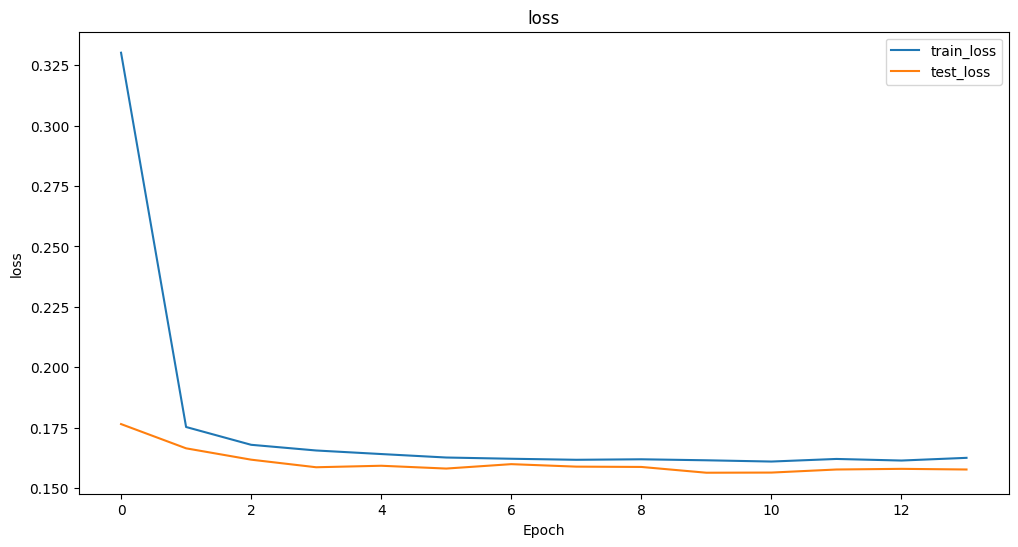

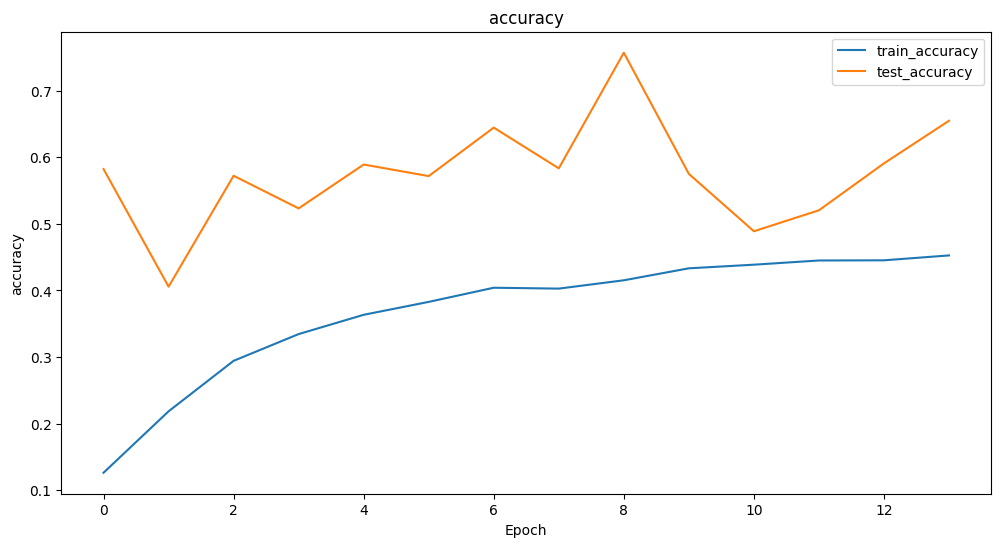

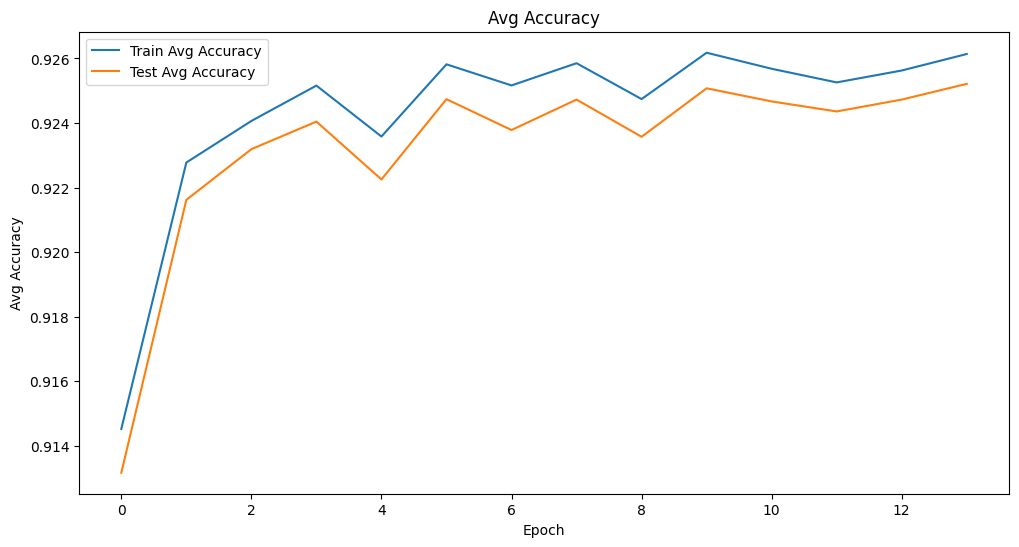

334.870349907


In [ ]:
start = time.perf_counter()

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

input_size = 300
output_size = 100


batch_size = 512
epochs = 14
layers = 7
neurons = 512
learning_rate = 0.00447378995501814
threshold = 0.5


# class_weights = {0: 1.0, 1: 6.0}  # class1の重みを調整

# # tf.keras.layers.Normalization レイヤーを追加
# normalization_layer = tf.keras.layers.Normalization(axis=-1)
# normalization_layer.adapt(x_train)
# x_train = normalization_layer(x_train)
# print(x_train)

model = Sequential()

# model.add(InputLayer(input_shape=(200,)))
model.add(Dense(input_size, activation='relu', input_shape=(input_size,)))
model.add(Dropout(0.2))

# middle layer 2 to layer 500
for i in range(1, layers-1, 1):
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(0.2))

model.add(Dense(output_size, activation='sigmoid'))

model.summary()

def hit_acc(self, x, y_true, logs):
    # テストデータに対する予測を取得
    y_pred = self.model.predict(x)
    # 予測されたクラスを取得（確率が0.5以上の場合は1、それ以外の場合は0としています）
    y_pred_classes = np.where(y_pred >= threshold, 1, 0)

    del y_pred

    # 正解ラベルと予測結果が一致するかどうかを確認し、行ごとの正答率を計算
    elementwise_accuracy = np.mean(y_true == y_pred_classes, axis=1)

    del y_pred_classes

    # 平均正答率を計算してログに追加
    avg_acc = np.mean(elementwise_accuracy)

    del elementwise_accuracy

    return avg_acc

class ElementwiseAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        test_acc = hit_acc(self, x_test, y_test, logs)
        train_acc = hit_acc(self, x_train, y_train, logs)
        logs['test_avg_accuracy'] = test_acc
        logs['train_avg_accuracy'] = train_acc

# カスタムコールバックを定義
accuracy_callback = ElementwiseAccuracy()



# モデルのコンパイル時にコールバックを指定
# model.compile(loss='categorical_crossentropy',
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=kera.optimizers.Adam(learning_rate),
              metrics=['accuracy'])

# モデルの訓練時にコールバックを指定
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[accuracy_callback],
                    # class_weight=class_weights,
)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 出力の確率分布の表示のための整形
y_pred_array = np.array(model.predict(x_test))
y_test_array = np.array(y_test)

# 0埋め排除のため
for i in range(len(x_test_count_hits)):
    y_pred_array[i, x_test_count_hits[i]:] = np.nan

# 各行について、予測値が1でテスト値が0である要素の数を数える
count_10 = np.sum((y_pred_array > threshold) & (y_test_array == 0), axis=1)
count_11 = np.sum((y_pred_array > threshold) & (y_test_array == 1), axis=1)
# count_01 = np.sum((y_pred_array <= threshold) & (y_test_array == 1), axis=1)

# トラック有り無しに分ける
x_test_count_hits_0 = x_test_count_hits[c301_test == 0]
x_test_count_hits_1 = x_test_count_hits[c301_test == 1]

c00_test = c00_test.values.reshape(-1)
count_10_0 = count_10[c301_test == 0]
count_10_1 = count_10[c301_test == 1]
count_11_0 = count_11[c301_test == 0]
count_11_1 = count_11[c301_test == 1]

y_pred_0 = y_pred_array[y_test_array == 0]
y_pred_1 = y_pred_array[y_test_array == 1]

# 0埋め排除のため
y_pred_0 = y_pred_0[~np.isnan(y_pred_0)]
y_pred_1 = y_pred_1[~np.isnan(y_pred_1)]


def plot_history(train_history, test_history, title, train_label, test_label):
  plt.figure(figsize=(12, 6))
  plt.plot(train_history, label=train_label)
  plt.plot(test_history, label=test_label)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


# Plot loss
plot_history(history.history['loss'], history.history['val_loss'], 'loss', 'train_loss', 'test_loss')

# 100ヒット全部正解しているものの割合
plot_history(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 'train_accuracy', 'test_accuracy')

# ヒットごとを分母にしたacc
plot_history(history.history['train_avg_accuracy'], history.history['test_avg_accuracy'], 'Avg Accuracy', 'Train Avg Accuracy', 'Test Avg Accuracy')


print(time.perf_counter() - start)

#### 分析グラフの作成

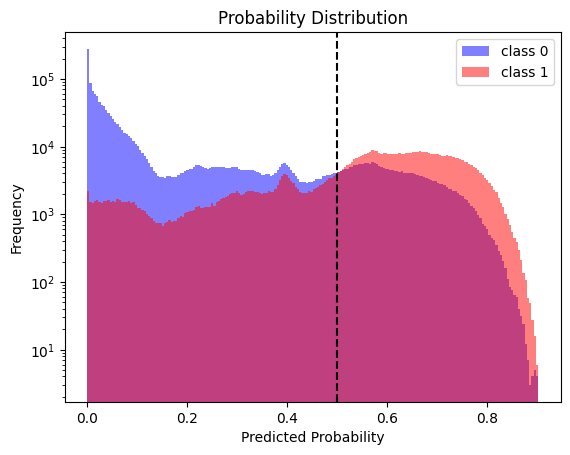

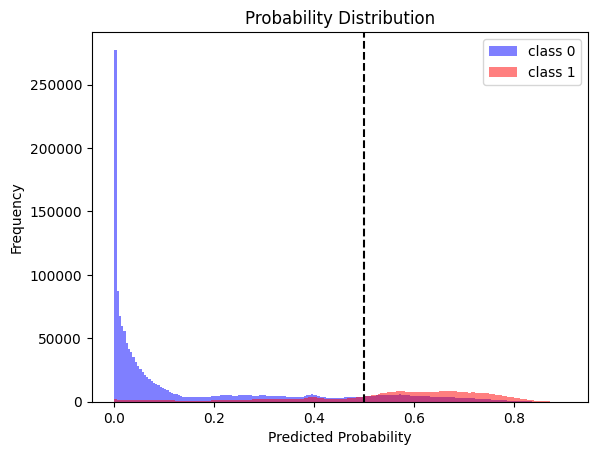

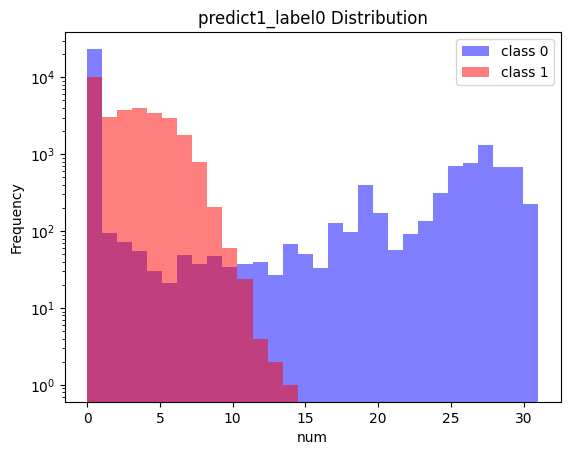

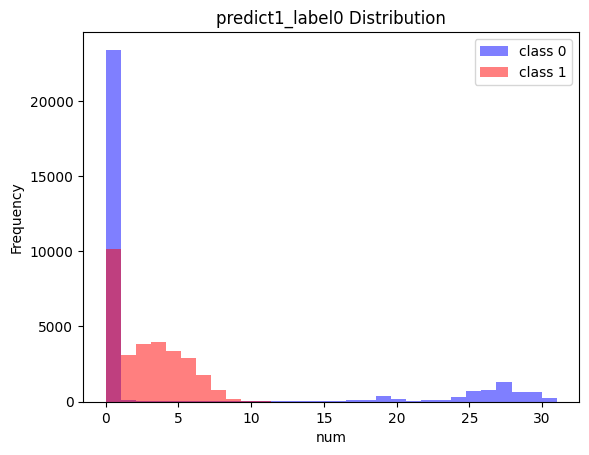

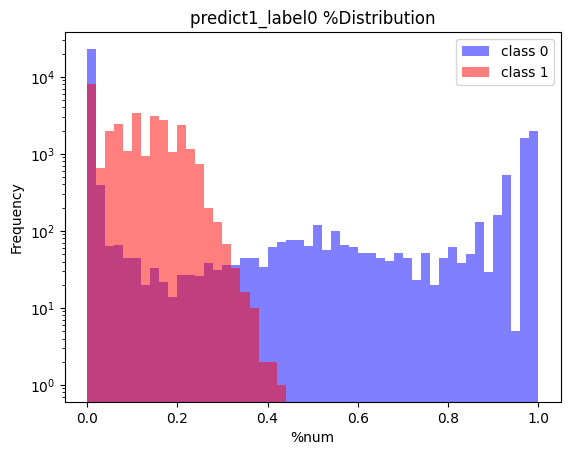

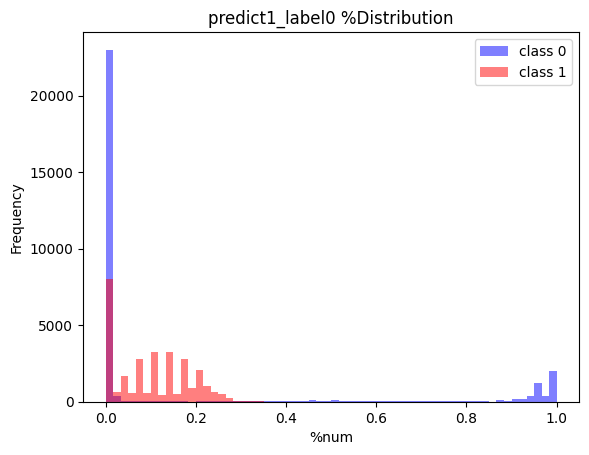

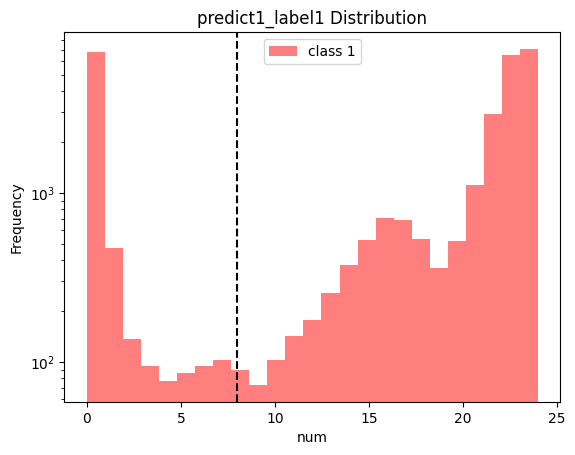

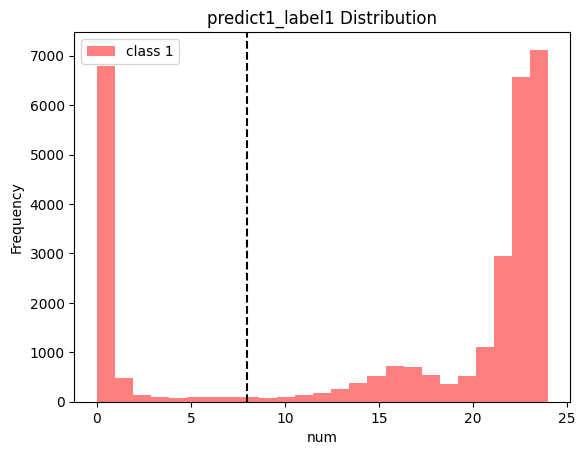

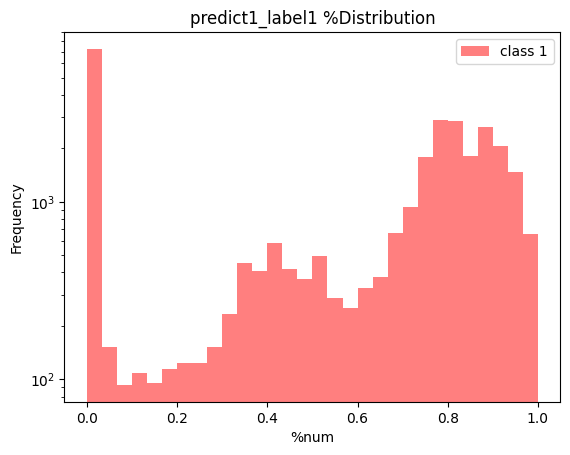

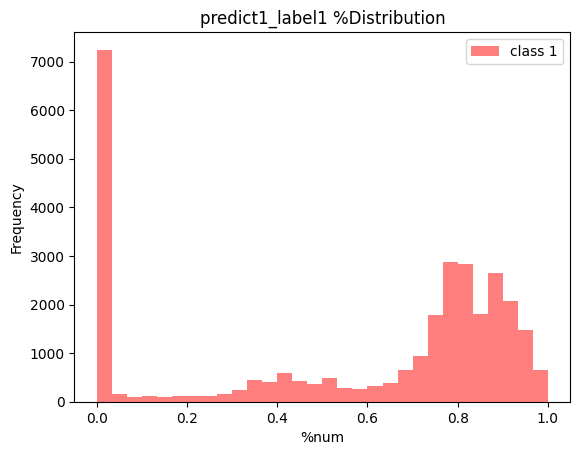

y_pred_0 の要素数: 1599232
y_pred_1 の要素数: 687298
y_pred_0 > 0.23 の割合 0.3116508424043541
y_pred_1 > 0.23 の割合: 0.9090045366056645
y_pred_0 > 0.5 の割合 0.15308848247158635
y_pred_1 > 0.5 の割合: 0.7066730879472951
y_pred_0 > 0.5 の個数 244824
y_pred_1 > 0.5 の個数: 485695
count_10_0の要素数 29847
count_10_1の要素数 30153
count10_0の値が1以上のもののの割合: 0.22960431534157535
count10_1の値が1以上のもののの割合: 0.7338241634331576
count10_0の値が1以上のもののの個数: 6853
count10_1の値が1以上のもののの個数: 22127
count_11_0の要素数 29847
count_11_1の要素数 30153
count11_0の値が8以上のもののの割合: 0.0
count11_1の値が8以上のもののの割合: 0.7396610619175538
count11_0の値が8以上のもののの個数: 0
count11_1の値が8以上のもののの個数: 22303


In [ ]:
threshold = 0.23
threshold1 = 0.5

x_test_count_hits_0 = x_test_count_hits[c301_test == 0]
x_test_count_hits_1 = x_test_count_hits[c301_test == 1]



#出力の確率分布を表示
bins = np.histogram_bin_edges(y_pred_0, bins=200)
plt.hist(y_pred_0, bins=bins, alpha=0.5, color='blue', label='class 0')
plt.hist(y_pred_1, bins=bins, alpha=0.5, color='red', label='class 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.axvline(x=threshold1, color='black', linestyle='--')
# plt.axvline(x=threshold, color='black', linestyle='--')
plt.yscale('log')
plt.legend()
plt.show()

#出力の確率分布を表示
bins = np.histogram_bin_edges(count_10_0, bins=30)
plt.hist(count_10_0, bins=bins, alpha=0.5, color='blue', label='class 0')
plt.hist(count_10_1, bins=bins, alpha=0.5, color='red', label='class 1')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.title('predict1_label0 Distribution')
plt.yscale('log')
plt.legend()
plt.show()

#出力の確率分布を表示
bins = np.histogram_bin_edges(count_10_0 / x_test_count_hits_0, bins=50)
plt.hist(count_10_0 / x_test_count_hits_0, bins=bins, alpha=0.5, color='blue', label='class 0')
plt.hist(count_10_1 / x_test_count_hits_1, bins=bins, alpha=0.5, color='red', label='class 1')
plt.xlabel('%num')
plt.ylabel('Frequency')
plt.title('predict1_label0 %Distribution')
plt.yscale('log')
plt.legend()
plt.show()

#出力の確率分布を表示
bins = np.histogram_bin_edges(count_11_1, bins=25)
# plt.hist(count_11_0, bins=bins, alpha=0.5, color='blue', label='class 0')
plt.hist(count_11_1, bins=bins, alpha=0.5, color='red', label='class 1')
plt.xlabel('num')
plt.ylabel('Frequency')
plt.title('predict1_label1 Distribution')
plt.axvline(x=8, color='black', linestyle='--')
plt.yscale('log')
plt.legend()
plt.show()

#出力の確率分布を表示
bins = np.histogram_bin_edges(count_11_1 / x_test_count_hits_1, bins=30)
# plt.hist(count_11_0 / x_test_count_hits_0, bins=bins, alpha=0.5, color='blue', label='class 0')
plt.hist(count_11_1 / x_test_count_hits_1, bins=bins, alpha=0.5, color='red', label='class 1')
plt.xlabel('%num')
plt.ylabel('Frequency')
plt.title('predict1_label1 %Distribution')
plt.yscale('log')
plt.legend()
plt.show()


print("y_pred_0 の要素数:", len(y_pred_0))
print("y_pred_1 の要素数:", len(y_pred_1))

print(f'y_pred_0 > {threshold} の割合', len(y_pred_0[y_pred_0 > threshold] == "true") / len(y_pred_0))
print(f"y_pred_1 > {threshold} の割合:", len(y_pred_1[y_pred_1 > threshold] == "true") / len(y_pred_1))

print(f'y_pred_0 > {threshold1} の割合', len(y_pred_0[y_pred_0 > threshold1] == "true") / len(y_pred_0))
print(f"y_pred_1 > {threshold1} の割合:", len(y_pred_1[y_pred_1 > threshold1] == "true") / len(y_pred_1))
print(f'y_pred_0 > {threshold1} の個数', len(y_pred_0[y_pred_0 > threshold1] == "true"))
print(f"y_pred_1 > {threshold1} の個数:", len(y_pred_1[y_pred_1 > threshold1] == "true"))

print("count_10_0の要素数", len(count_10_0))
print("count_10_1の要素数", len(count_10_1))

print(f"count10_0の値が1以上のもののの割合:", len(count_10_0[count_10_0 >= 1] == "true") / len(count_10_0))
print(f"count10_1の値が1以上のもののの割合:", len(count_10_1[count_10_1 >= 1] == "true") / len(count_10_1))
print(f"count10_0の値が1以上のもののの個数:", len(count_10_0[count_10_0 >= 1] == "true"))
print(f"count10_1の値が1以上のもののの個数:", len(count_10_1[count_10_1 >= 1] == "true"))

print("count_11_0の要素数", len(count_11_0))
print("count_11_1の要素数", len(count_11_1))
print(f"count11_0の値が8以上のもののの割合:", len(count_11_0[count_11_0 >= 8] == "true") / len(count_11_0))
print(f"count11_1の値が8以上のもののの割合:", len(count_11_1[count_11_1 >= 8] == "true") / len(count_11_1))
print(f"count11_0の値が8以上のもののの個数:", len(count_11_0[count_11_0 >= 8] == "true"))
print(f"count11_1の値が8以上のもののの個数:", len(count_11_1[count_11_1 >= 8] == "true"))

#### 分析データの保存

In [ ]:
c00_test = c00_test.to_numpy().reshape(-1, 1)
count_10 = count_10.reshape(-1, 1)
count_11 = count_11.reshape(-1, 1)
x_test_count_hits = x_test_count_hits.reshape(-1, 1)

# c00_testと結合して3列のデータに
data = np.hstack((c00_test, count_10, count_11, x_test_count_hits))

# pandasのDataFrameに変換
df = pd.DataFrame(data, columns=['c00', 'count_10', 'count_11', 'x_test_count_hits'])

# CSVファイルに書き出し
df.to_csv("/content/drive/MyDrive/Colab Notebooks/tokken/deeplerning/analisys/data(hitByHit)/20240509note_experiment2.csv", index=False)

### 正解・不正解データを確認

In [ ]:
# Class 1で不正解のデータを抽出してファイルに保存
incorrect_indices = np.where((y_pred_classes != y_true) & (y_true == 1))[0]
incorrect_data = x_test.iloc[incorrect_indices]
incorrect_data.insert(0, 'c00', c00_test.iloc[incorrect_indices])  # c00列を追加
incorrect_data.to_csv('incorrect_data_class1.csv', index=False)

# Class 1で正解のデータを抽出してファイルに保存
correct_indices = np.where((y_pred_classes == y_true) & (y_true == 1))[0]
correct_data = x_test.iloc[correct_indices]
correct_data.insert(0, 'c00', c00_test.iloc[correct_indices])  # c00列を追加
correct_data.to_csv('correct_data_class1.csv', index=False)

# Class 0で正解のデータを抽出してファイルに保存
other_indices = np.where((y_pred_classes == y_true) & (y_true == 0))[0]
other_data = x_test.iloc[other_indices]
other_data.insert(0, 'c00', c00_test.iloc[other_indices])  # c00列を追加
other_data.to_csv('correct_data_class0.csv', index=False)

# Class 0で不正解のデータを抽出してファイルに保存
other_indices = np.where((y_pred_classes != y_true) & (y_true == 0))[0]
other_data = x_test.iloc[other_indices]
other_data.insert(0, 'c00', c00_test.iloc[other_indices])  # c00列を追加
other_data.to_csv('incorrect_data_class0.csv', index=False)